In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:

col = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=col)


In [ ]:
gf = pd.read_csv("magic04.data",names=col)
gf['class'] = (gf['class'] == 'g').astype(int)
gf

In [ ]:
df = gf
for label in col[:-1]:
  plt.hist(df[df["class"] == 1] [label] , color='blue' , label='gamma', alpha= 0.7 , density=True)
  plt.hist(df[df["class"] == 0] [label] , color='red' , label='hadron', alpha= 0.7 , density=True)
  plt.title(label)
  plt.ylabel("RIYOMA PREDICTION")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
#Train Validation Test

#Train Validation Test


In [ ]:
train , valid , test = np .split(df.sample(frac=1) , [int(0.6 * len(df)), int(0.8 * len(df))])

In [ ]:
def scale_dataset(dataframe , oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample :
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data ,x ,y

In [ ]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]) )

In [ ]:
train , xtrain, ytrain = scale_dataset(train , oversample=True)
valid , xvalid, yvalid = scale_dataset(valid , oversample=True)
test , xtest, ytest = scale_dataset(test , oversample=True)


#KNN

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(xtrain , ytrain)

In [ ]:
ypred = knn_model.predict(xtest)

In [ ]:
print(ypred)
print(ytest)

In [ ]:
print(classification_report(ytest , ypred))

Naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(xtrain,ytrain)


In [ ]:
ypred = nb_model.predict(xtest)
print(classification_report(ytest , ypred))

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = nb_model.fit(xtrain,ytrain)

In [ ]:
ypred = lg_model.predict(xtest)
print(classification_report(ytest , ypred))

In [ ]:
from sklearn.svm import SVC

In [54]:
svm_model = SVC()
svm_model = svm_model.fit(xtrain,ytrain)


In [55]:
ypred = svm_model.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2476
           1       0.80      0.90      0.84      2476

    accuracy                           0.83      4952
   macro avg       0.84      0.83      0.83      4952
weighted avg       0.84      0.83      0.83      4952



#Neural Network

In [56]:
import tensorflow as tf

In [57]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [62]:
input_shape=(10,)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',Input(input_shape)),   #input
    tf.keras.layers.Dense(32,activation='relu'),                      #Hidden
    tf.keras.layers.Dense(1,activation='sigmoid')                       #output
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

SyntaxError: positional argument follows keyword argument (901469423.py, line 3)

In [59]:

history = nn_model.fit(
    xtrain,ytrain,epochs=100 , batch_size =32 ,validation_split= 0.2 ,verbose =0

)

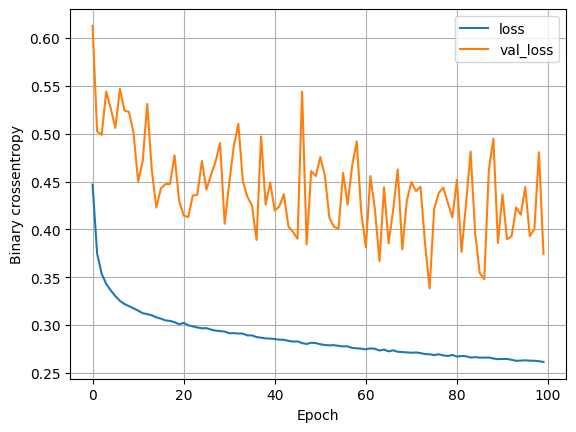

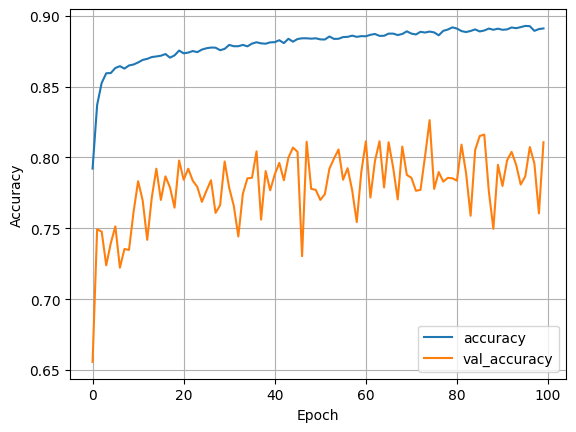

In [60]:
plot_loss(history)
plot_accuracy(history)

In [64]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)


    plt.show()


In [65]:
 
def train_model(Xtrain,Ytrain,num_nodes,droupout_prob,lr,batch_size,epochs):
  
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),   #input

      tf.keras.layers.Dropout(droupout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),                      #Hidden
      tf.keras.layers.Dropout(droupout_prob),


      tf.keras.layers.Dense(1,activation='sigmoid')                       #output
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(
    Xtrain,Ytrain,epochs=epochs , batch_size = batch_size ,validation_split= 0.2 ,verbose =0
    
)
  return nn_model ,history

num_nodes = 16 , droupout_prob = 0 , lr = 0.01 , batch_size = 32   


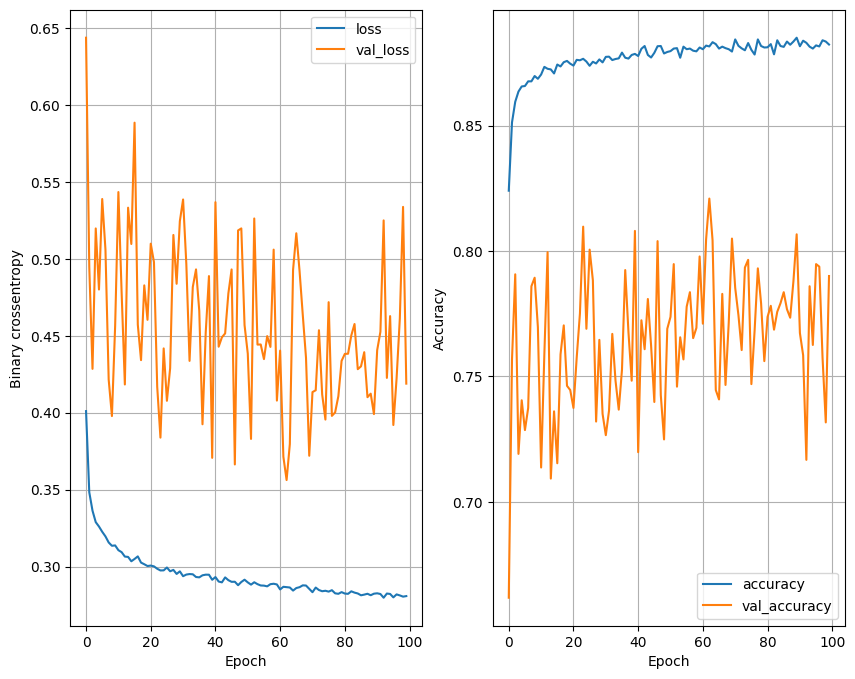

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8465 - loss: 0.3509
num_nodes = 16 , droupout_prob = 0 , lr = 0.01 , batch_size = 64   


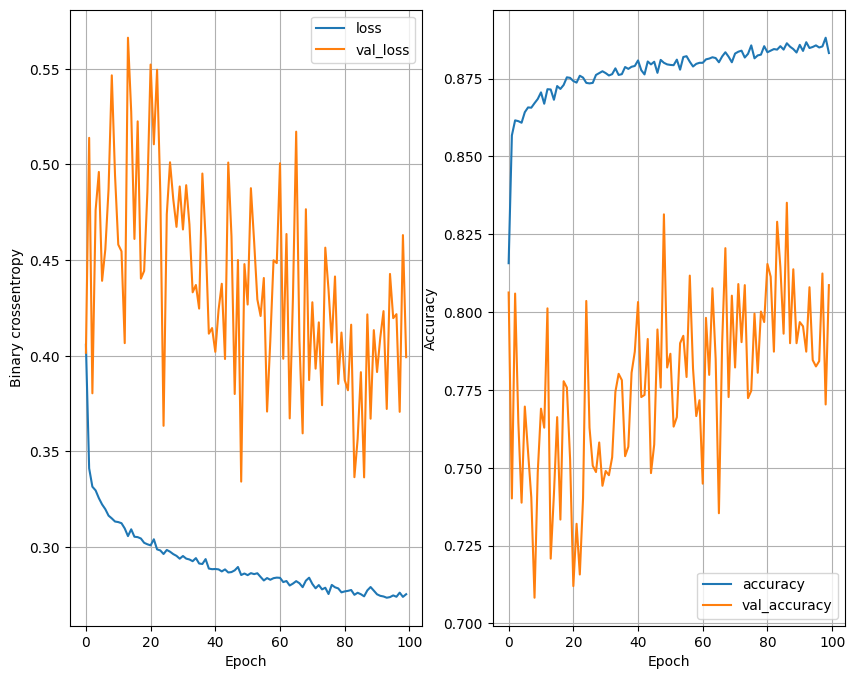

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8488 - loss: 0.3602
num_nodes = 16 , droupout_prob = 0 , lr = 0.01 , batch_size = 128   


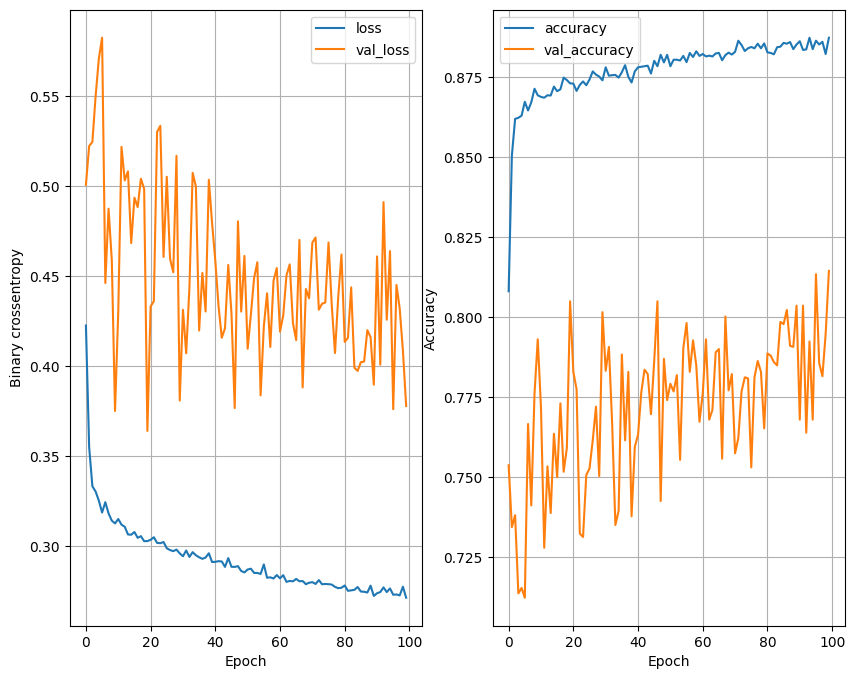

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.3409
num_nodes = 16 , droupout_prob = 0 , lr = 0.005 , batch_size = 32   


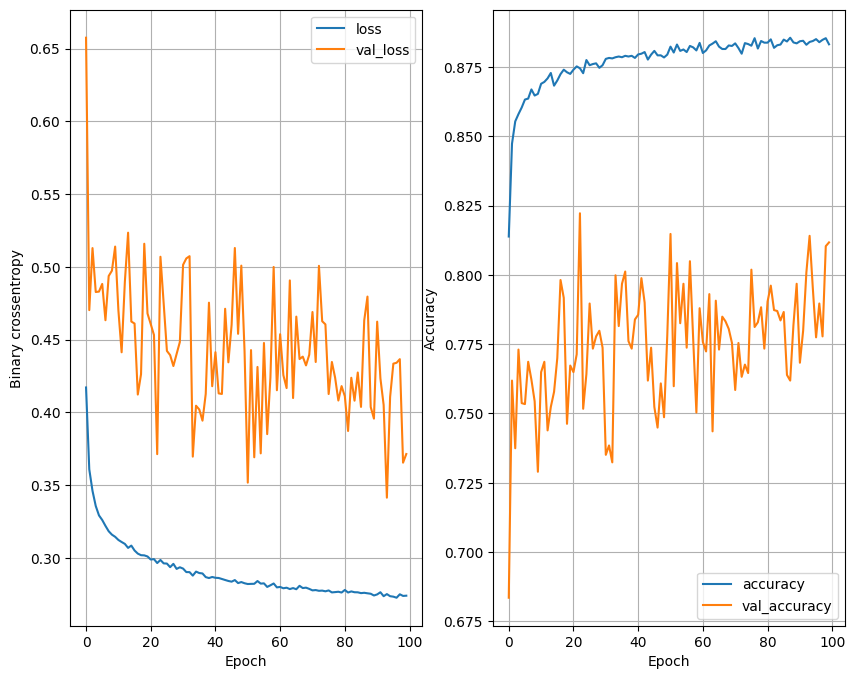

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.3543
num_nodes = 16 , droupout_prob = 0 , lr = 0.005 , batch_size = 64   


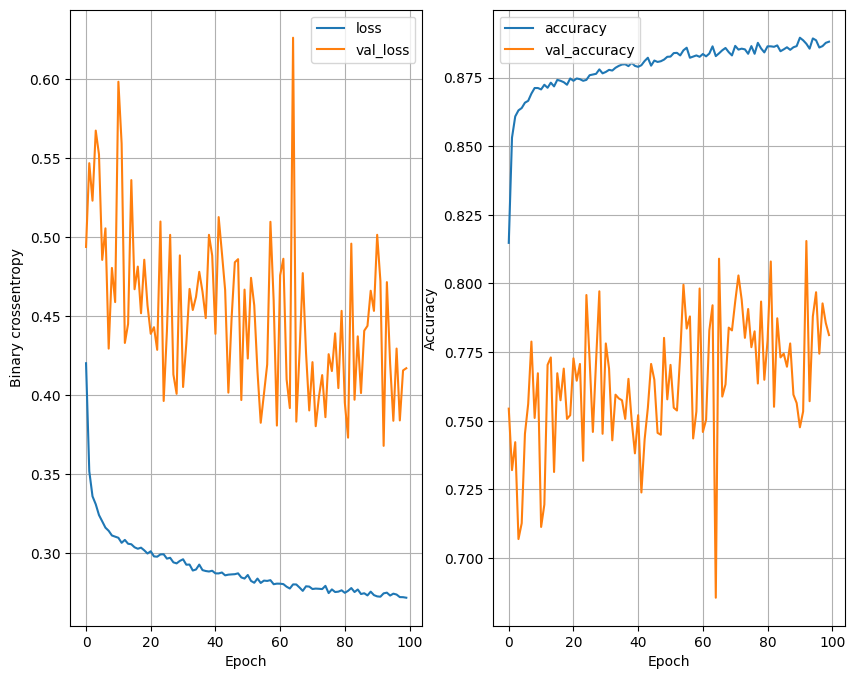

156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8435 - loss: 0.3647
num_nodes = 16 , droupout_prob = 0 , lr = 0.005 , batch_size = 128   


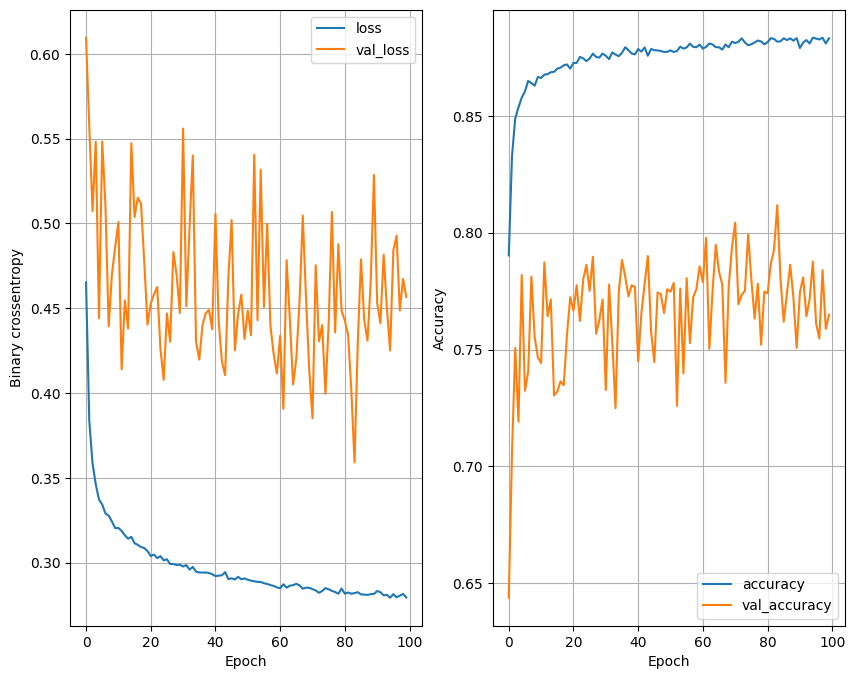

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8461 - loss: 0.3486
num_nodes = 16 , droupout_prob = 0 , lr = 0.001 , batch_size = 32   


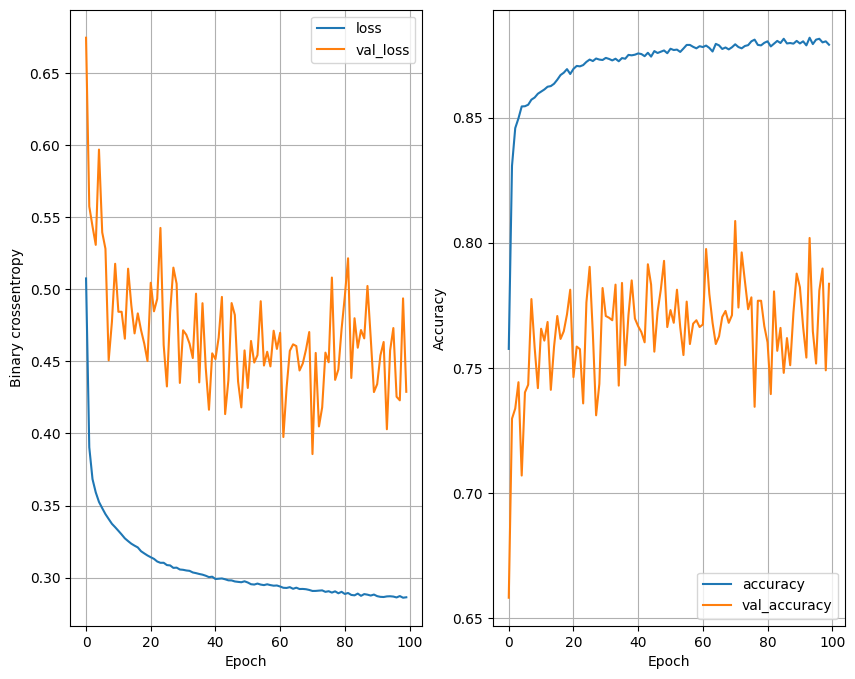

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8528 - loss: 0.3363
num_nodes = 16 , droupout_prob = 0 , lr = 0.001 , batch_size = 64   


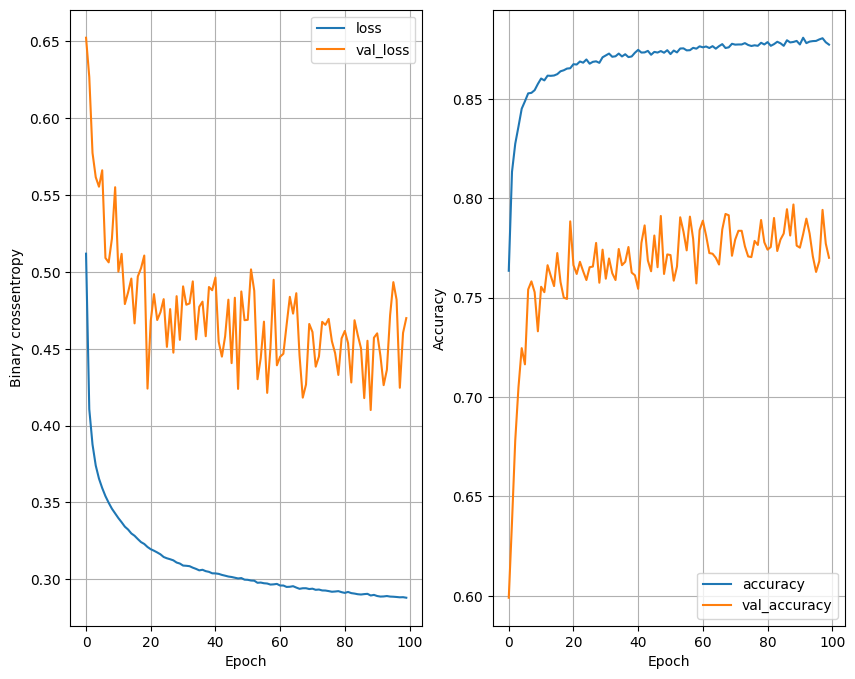

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8508 - loss: 0.3488
num_nodes = 16 , droupout_prob = 0 , lr = 0.001 , batch_size = 128   


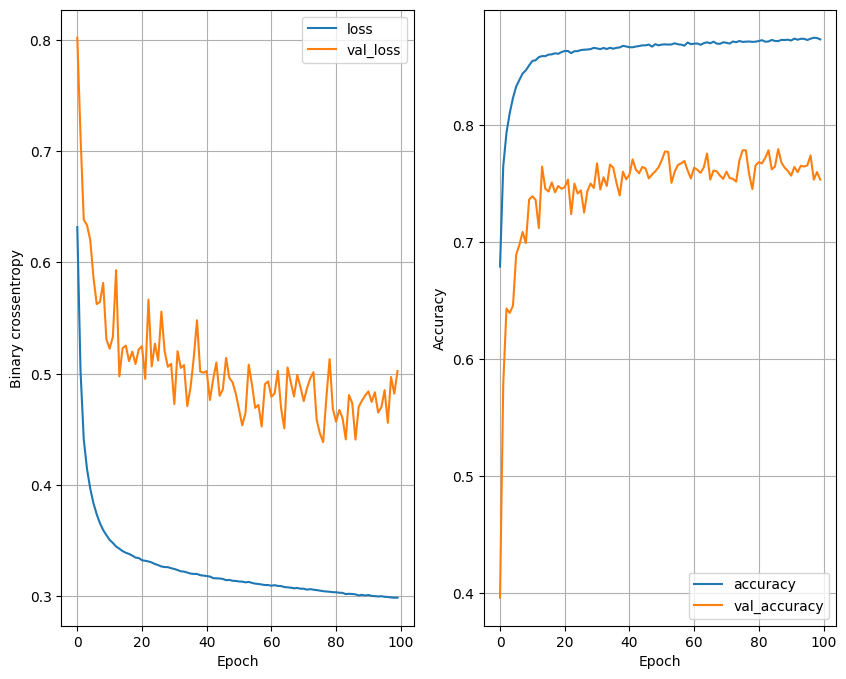

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 0.3585
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 32   


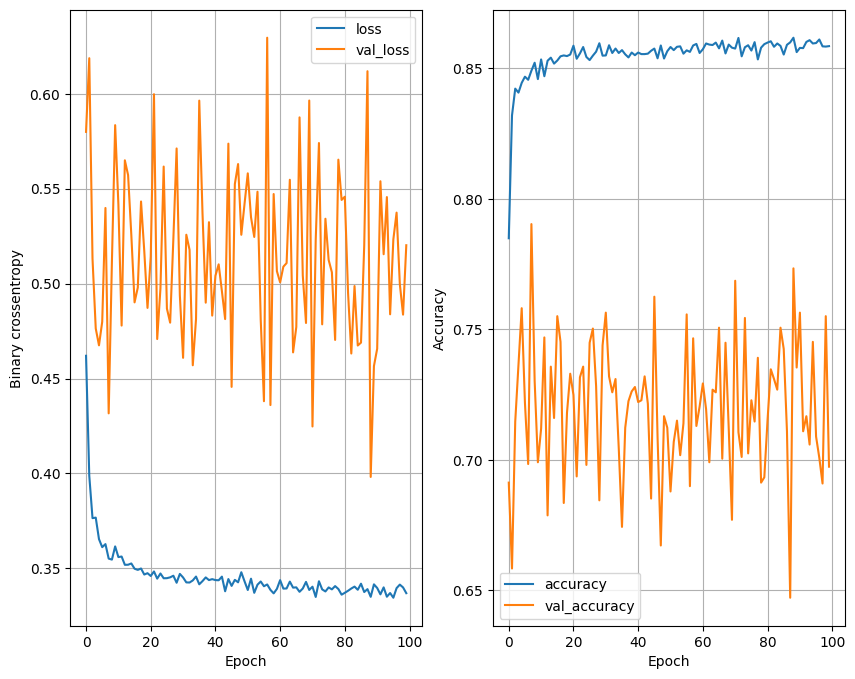

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.3617
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 64   


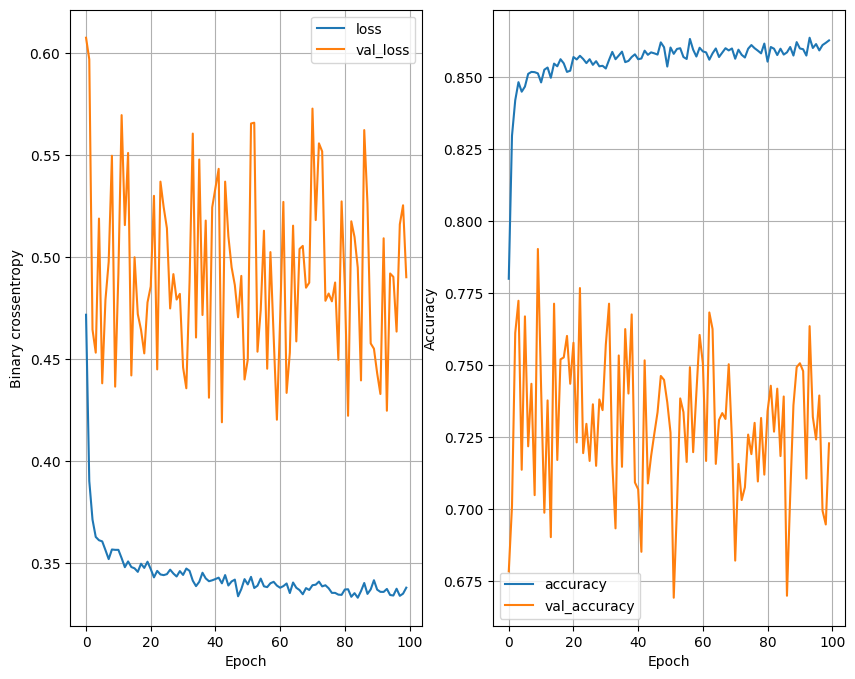

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8373 - loss: 0.3571
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 128   


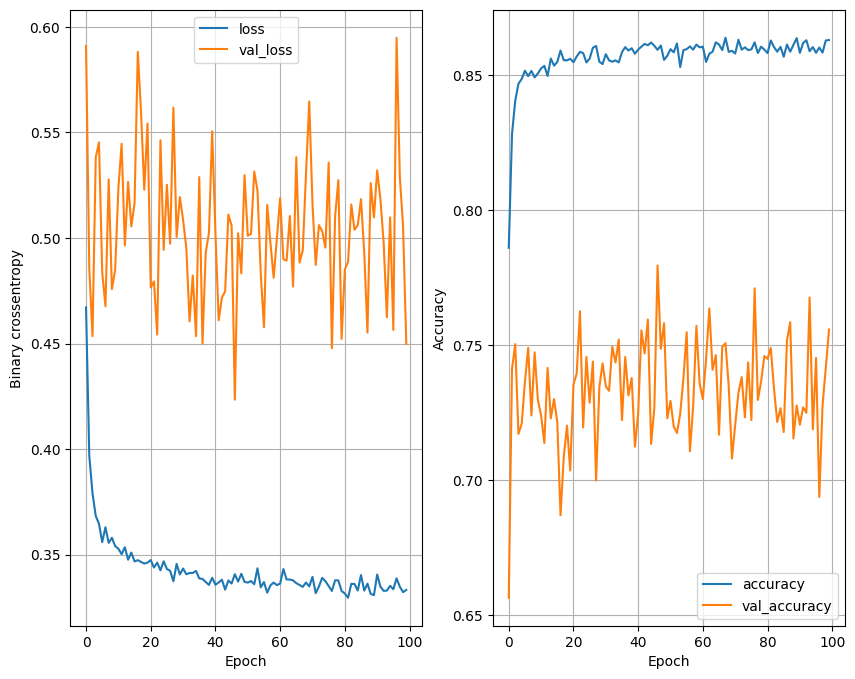

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8461 - loss: 0.3472
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 32   


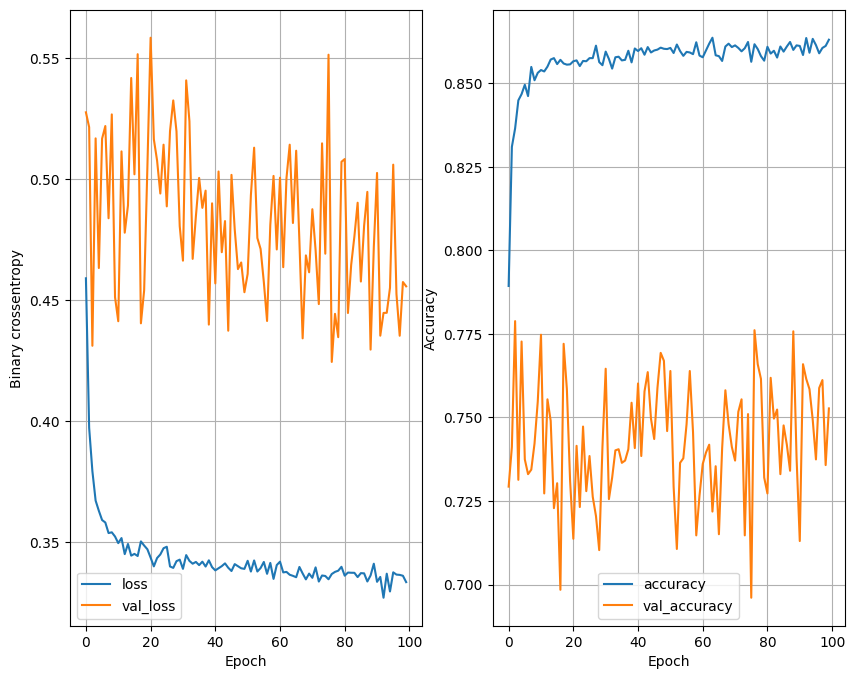

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3379
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 64   


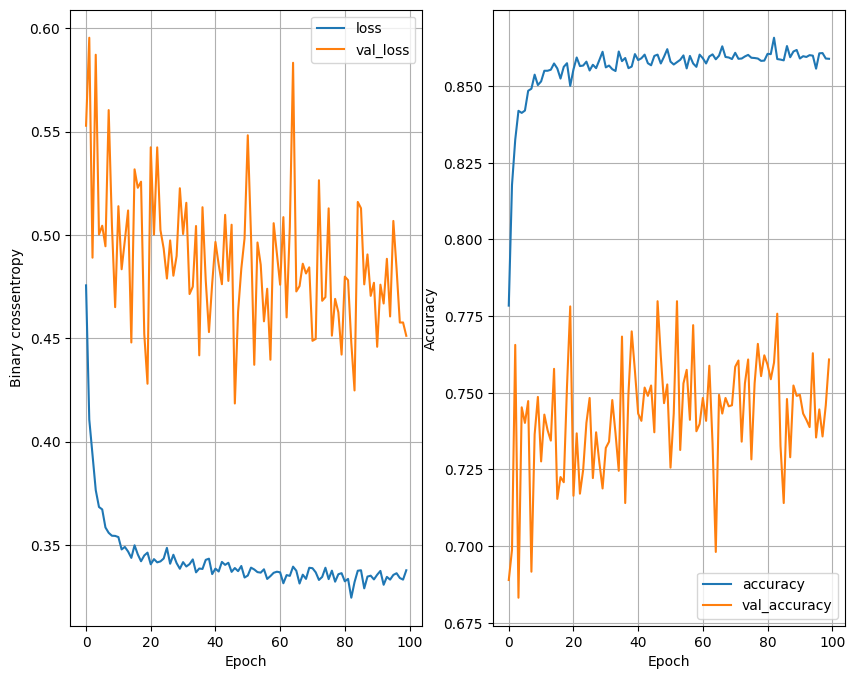

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8409 - loss: 0.3415
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 128   


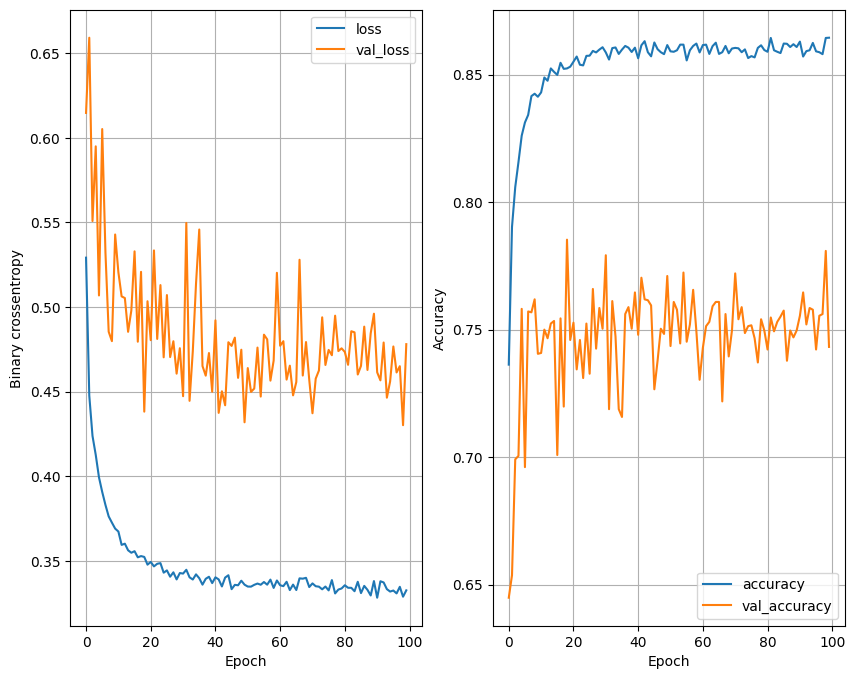

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.3507
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 32   


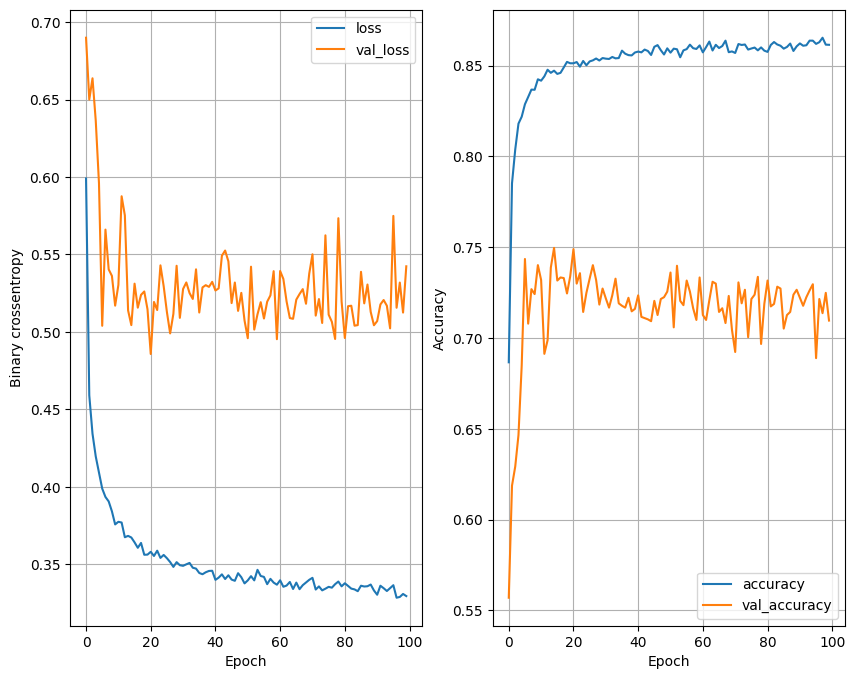

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8329 - loss: 0.3588
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 64   


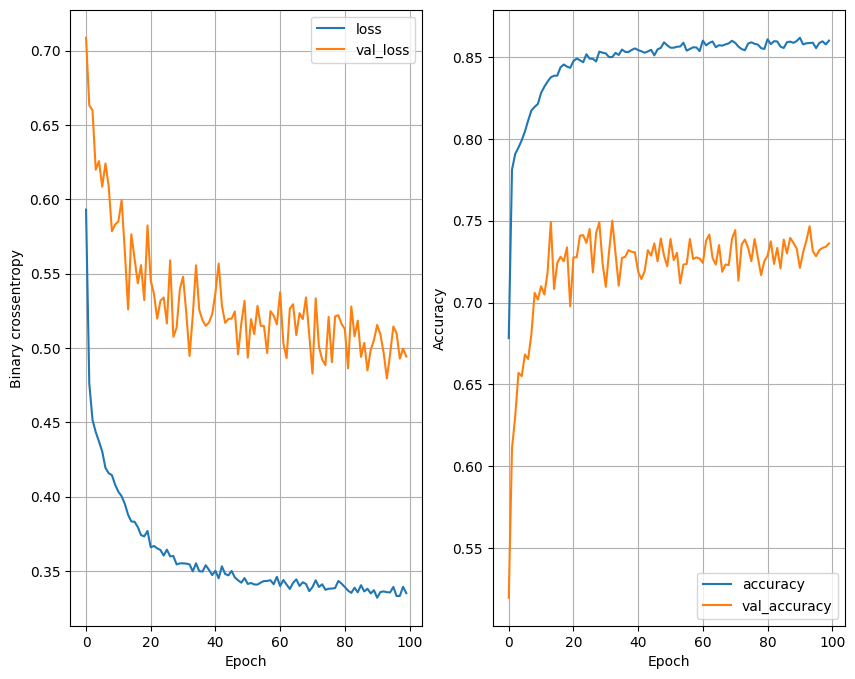

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.3474
num_nodes = 16 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 128   


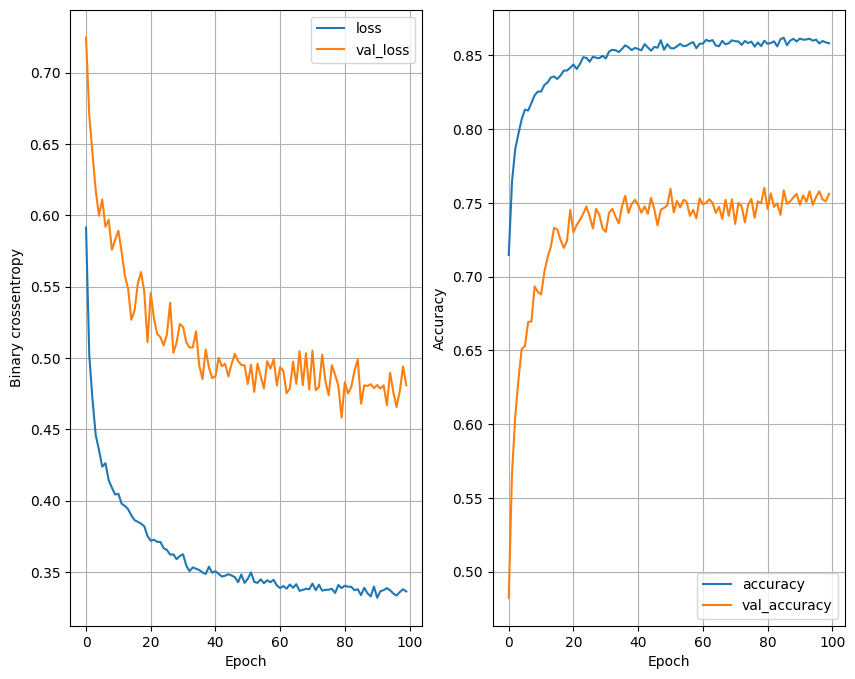

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.3483
num_nodes = 32 , droupout_prob = 0 , lr = 0.01 , batch_size = 32   


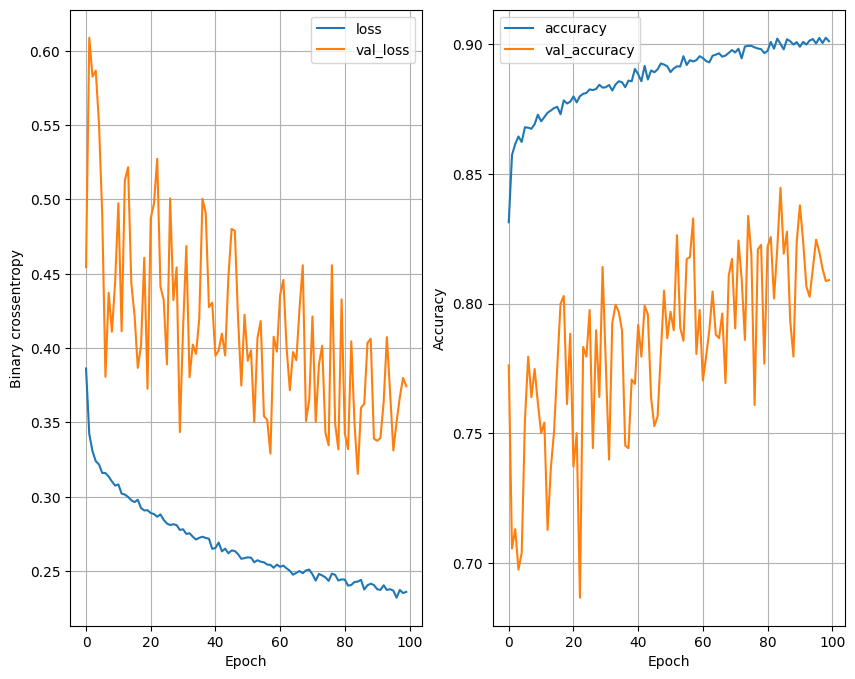

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3872
num_nodes = 32 , droupout_prob = 0 , lr = 0.01 , batch_size = 64   


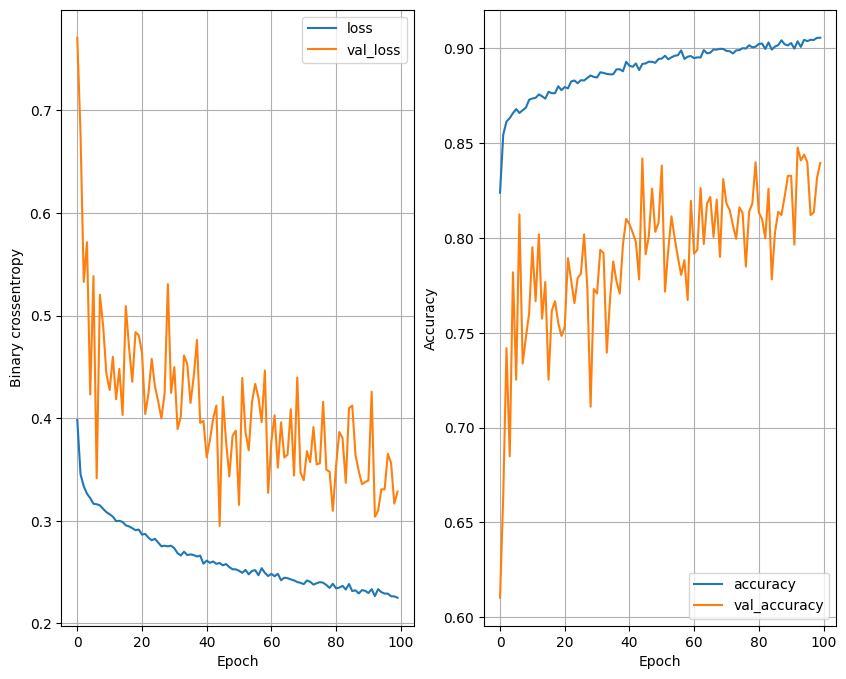

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.4311
num_nodes = 32 , droupout_prob = 0 , lr = 0.01 , batch_size = 128   


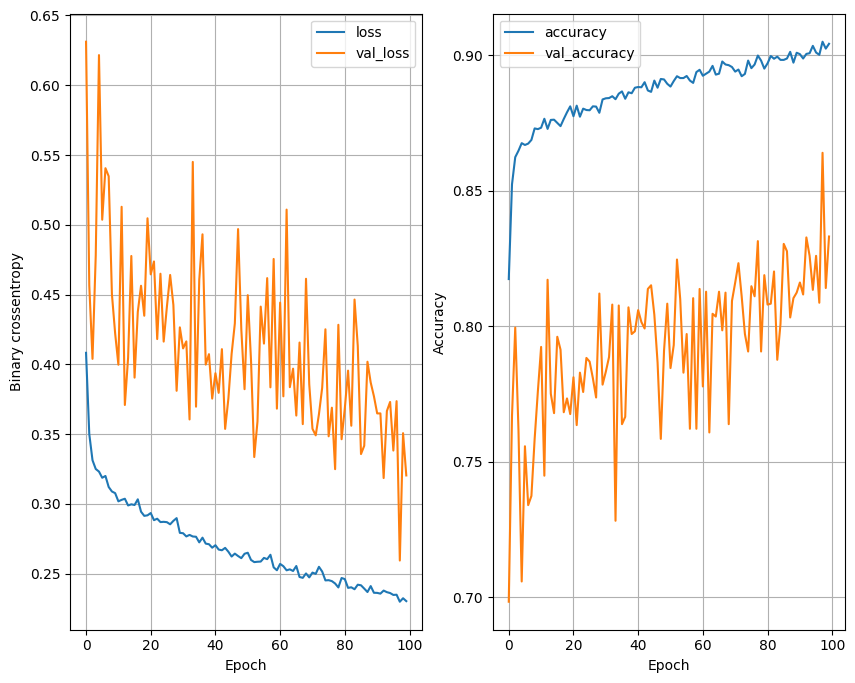

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3825
num_nodes = 32 , droupout_prob = 0 , lr = 0.005 , batch_size = 32   


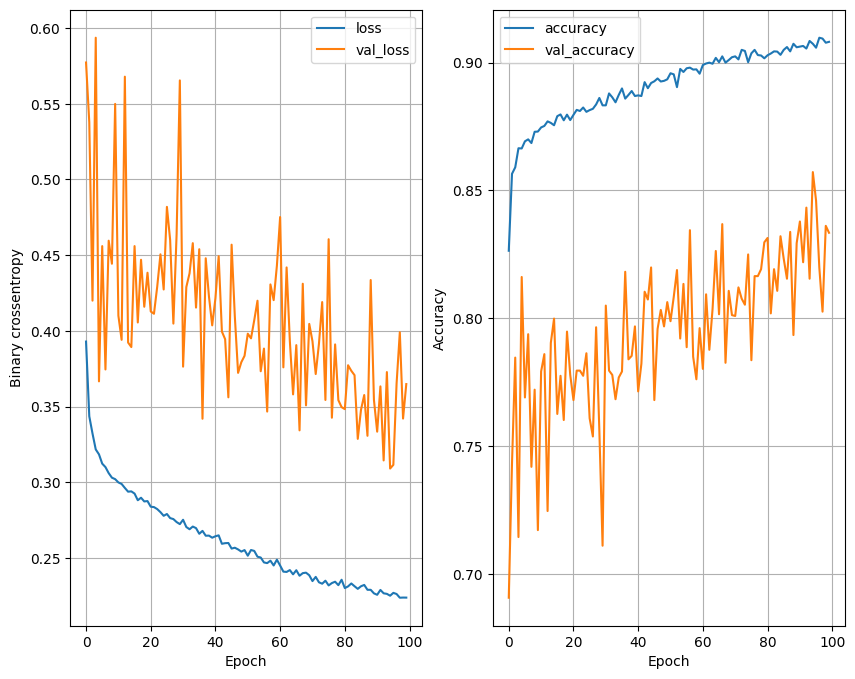

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.4319
num_nodes = 32 , droupout_prob = 0 , lr = 0.005 , batch_size = 64   


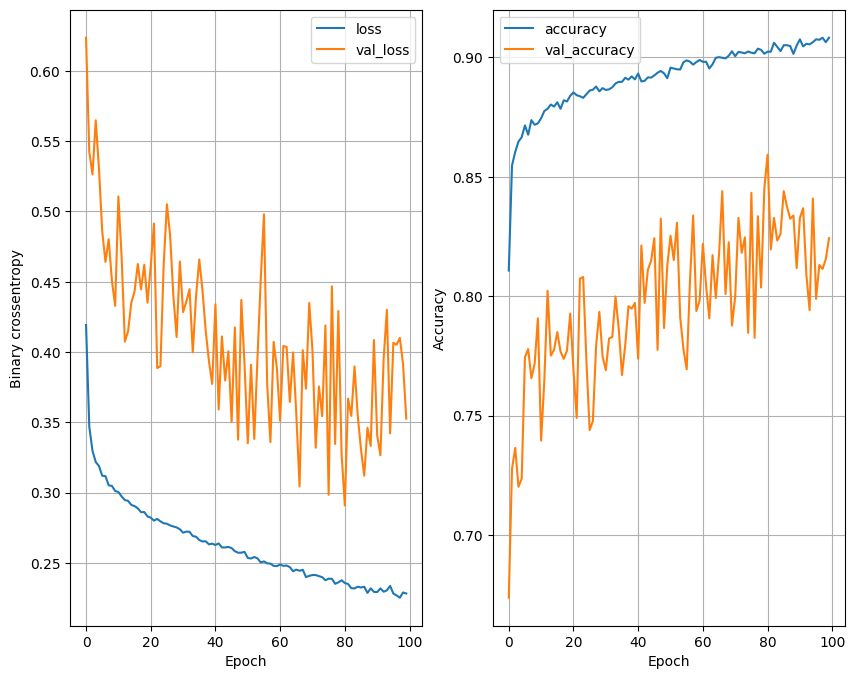

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8435 - loss: 0.3888
num_nodes = 32 , droupout_prob = 0 , lr = 0.005 , batch_size = 128   


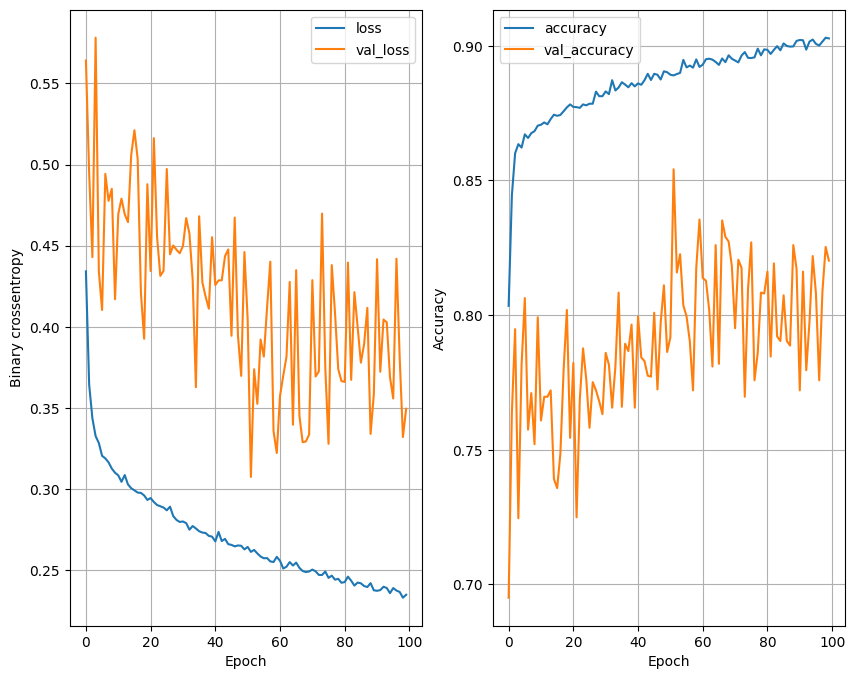

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.3766
num_nodes = 32 , droupout_prob = 0 , lr = 0.001 , batch_size = 32   


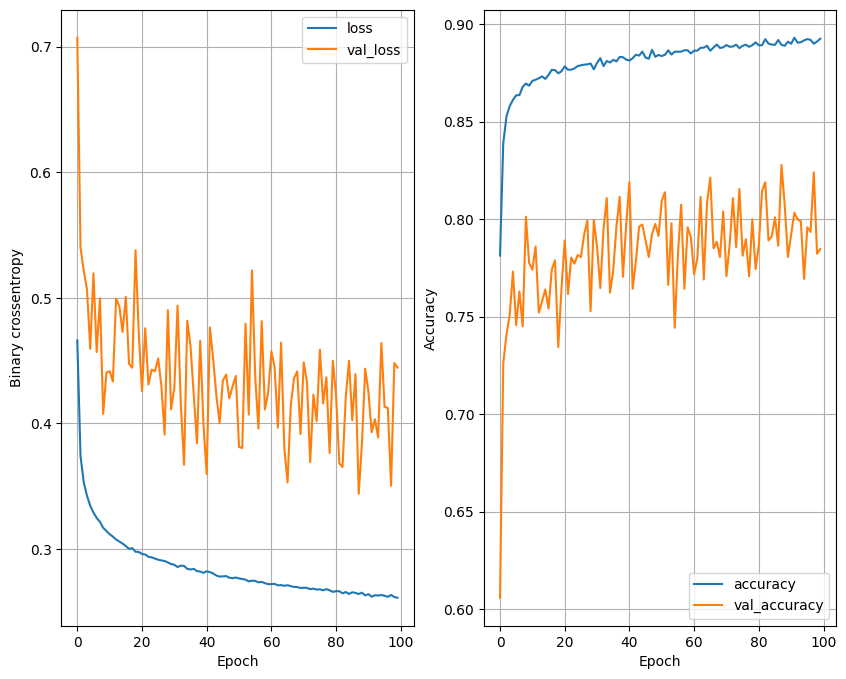

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.3476
num_nodes = 32 , droupout_prob = 0 , lr = 0.001 , batch_size = 64   


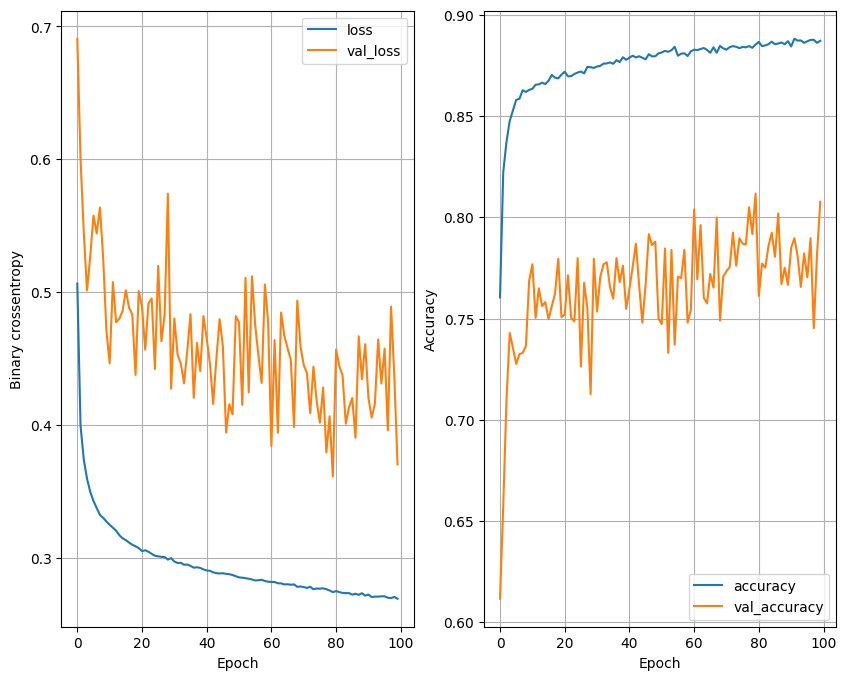

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.3321
num_nodes = 32 , droupout_prob = 0 , lr = 0.001 , batch_size = 128   


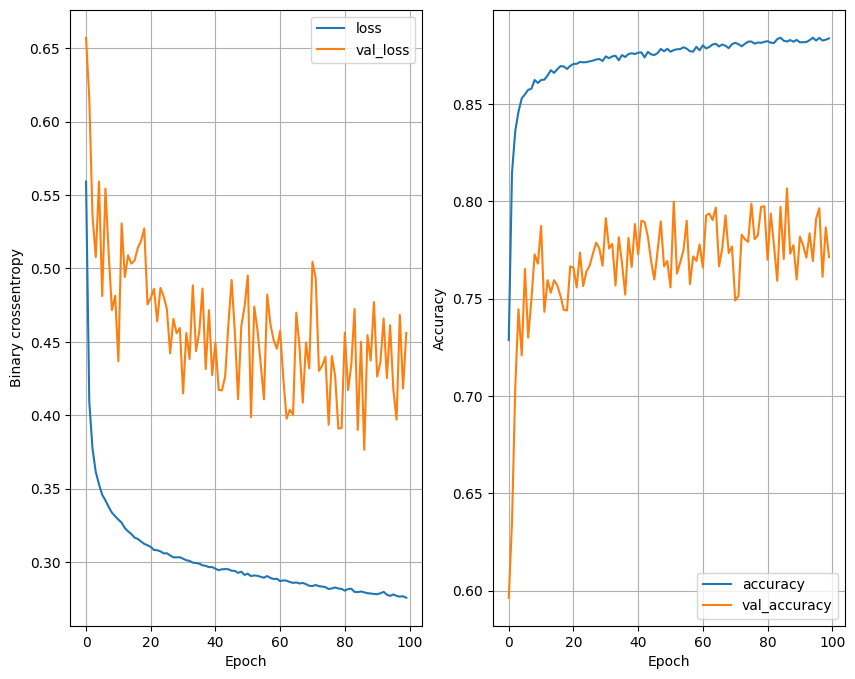

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.3529
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 32   


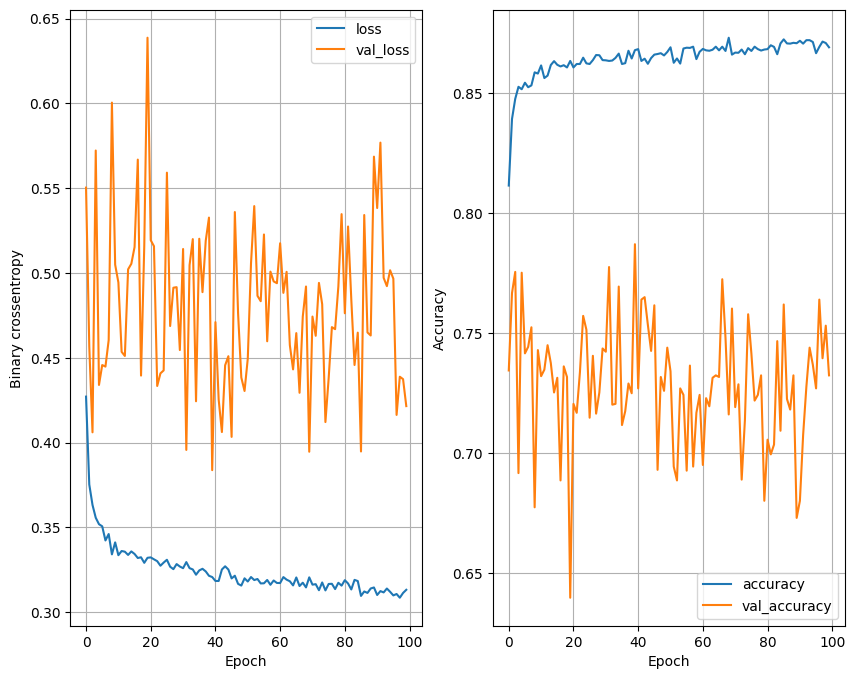

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.3465
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 64   


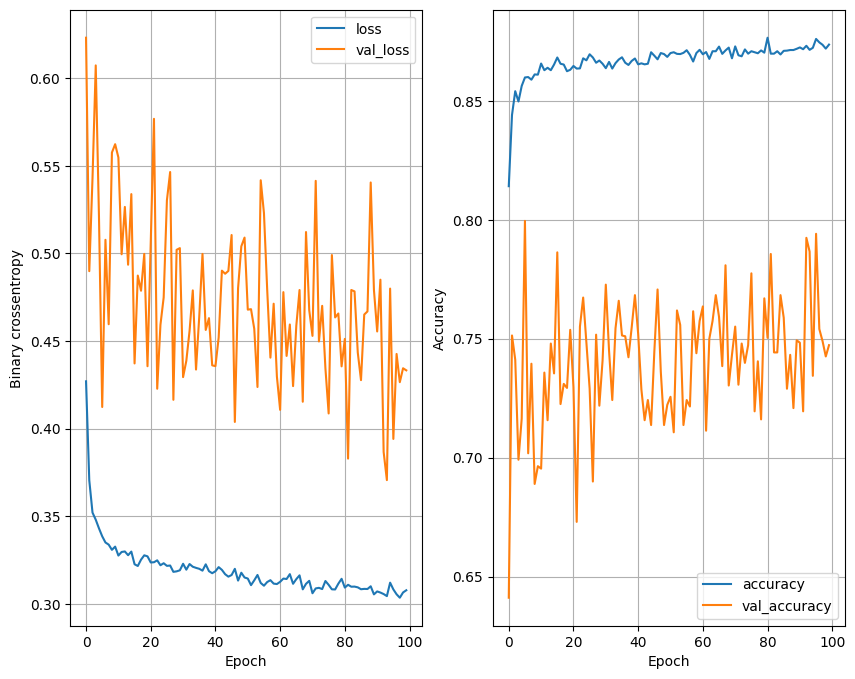

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.3396
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 128   


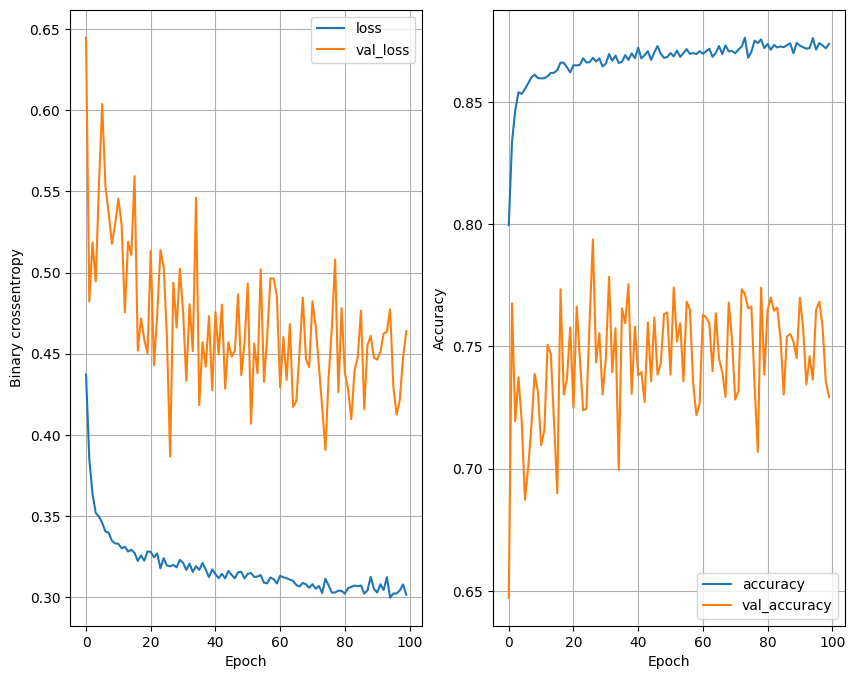

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8393 - loss: 0.3473
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 32   


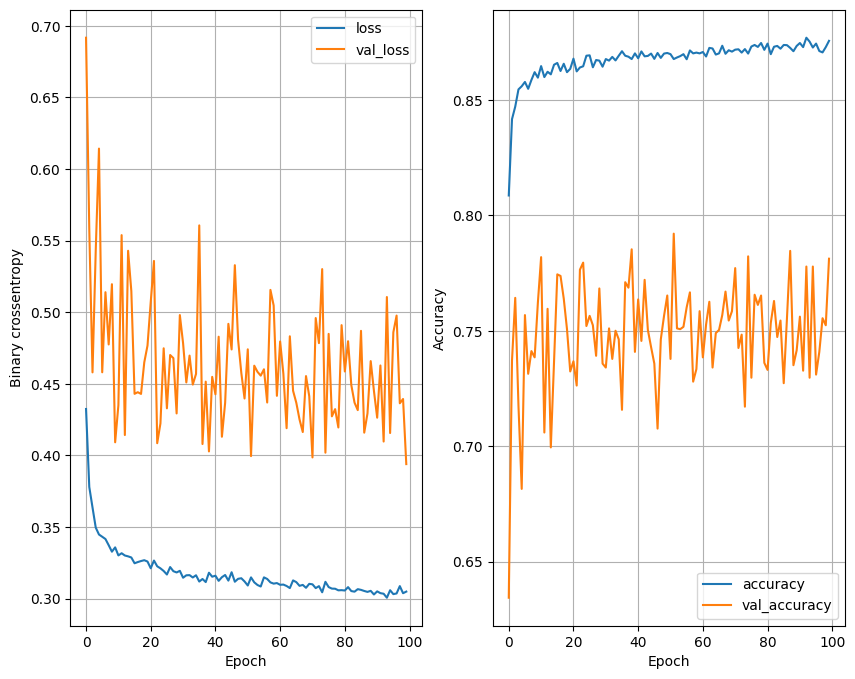

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3214
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 64   


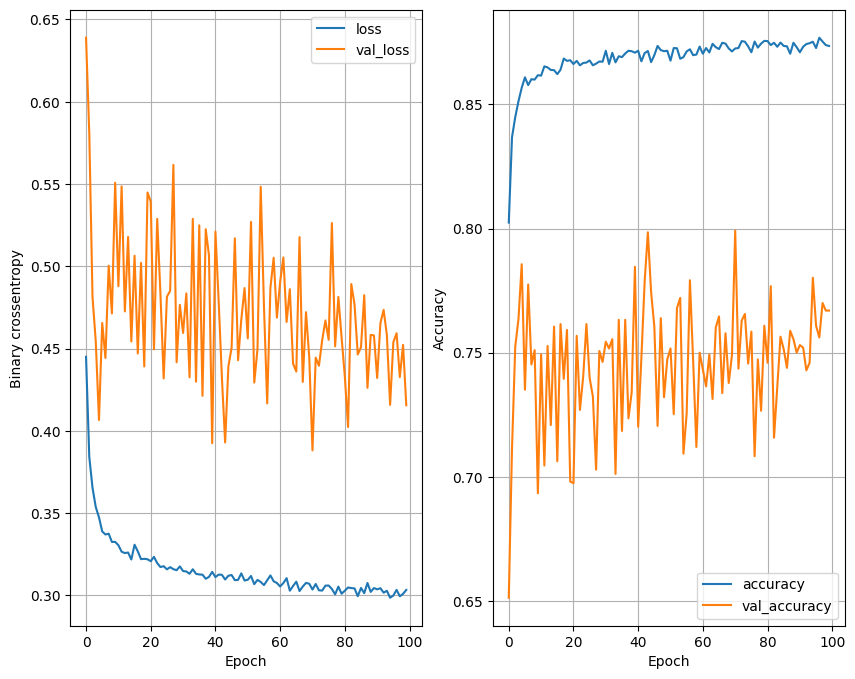

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3329
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 128   


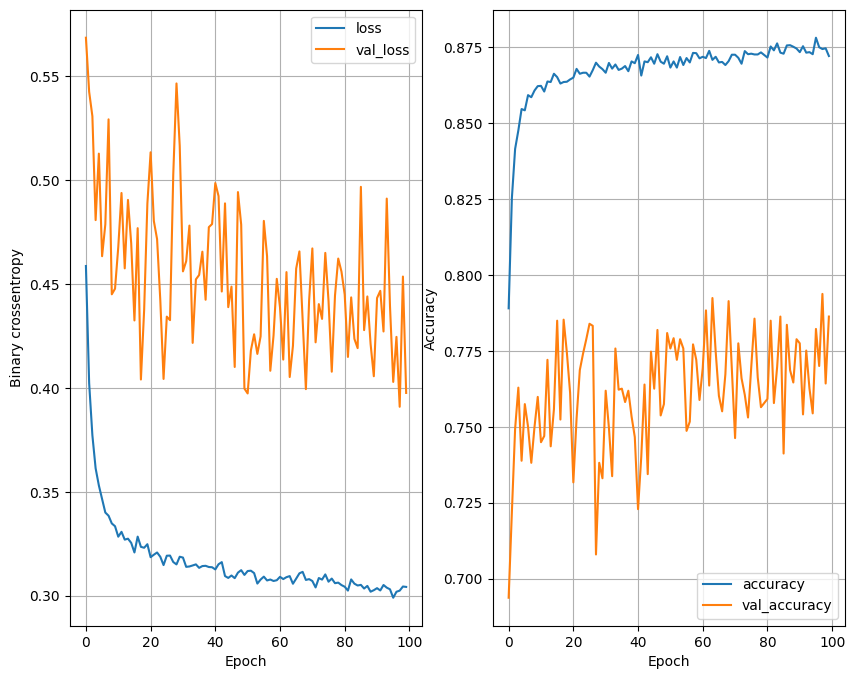

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8512 - loss: 0.3227
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 32   


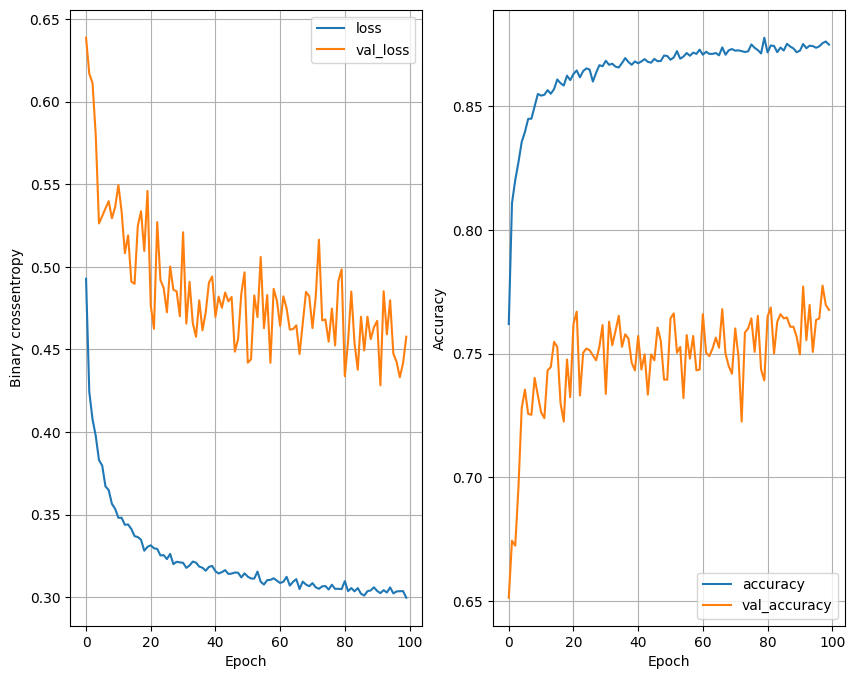

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.3352
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 64   


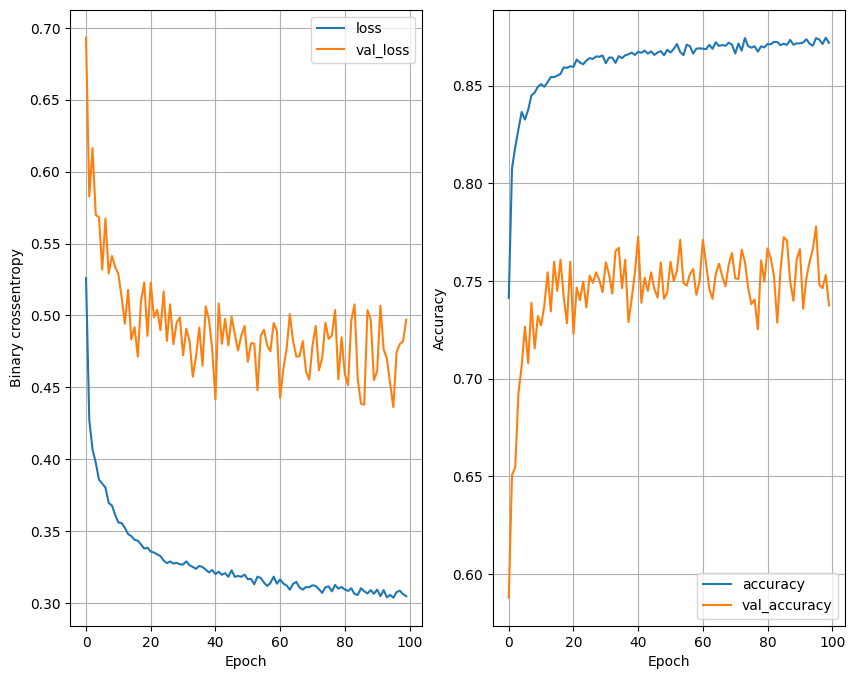

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8379 - loss: 0.3467
num_nodes = 32 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 128   


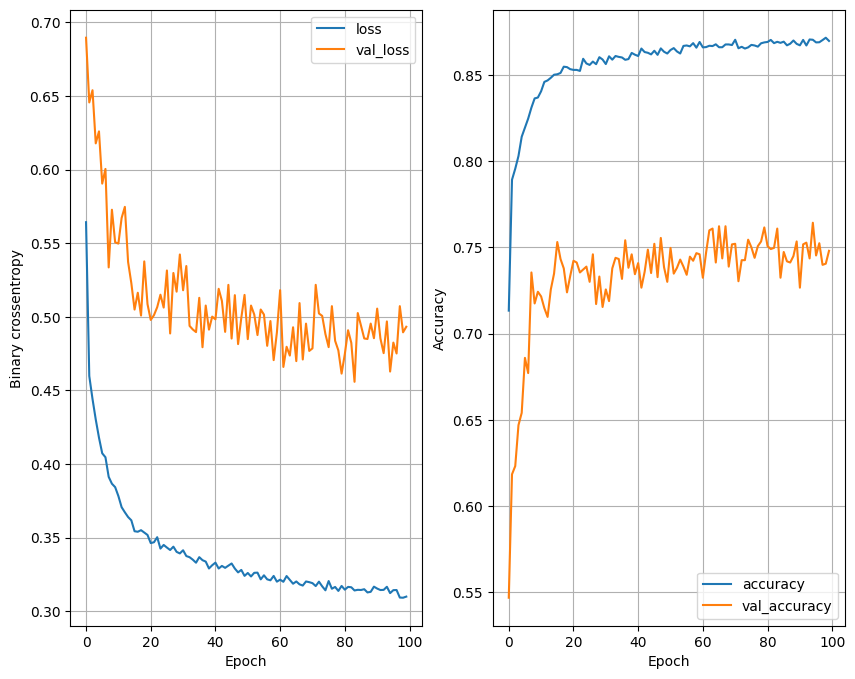

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.3436
num_nodes = 64 , droupout_prob = 0 , lr = 0.01 , batch_size = 32   


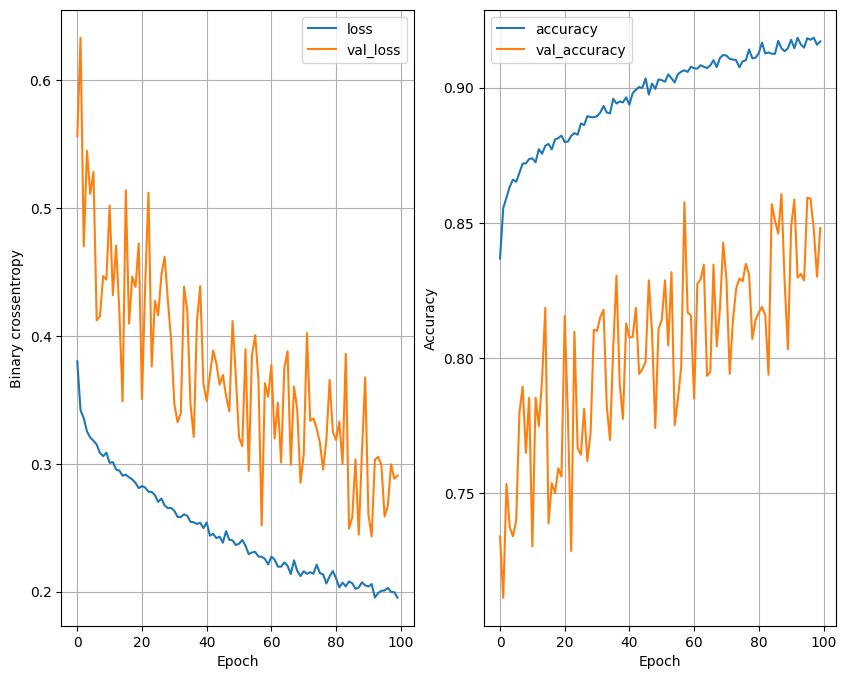

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.5476
num_nodes = 64 , droupout_prob = 0 , lr = 0.01 , batch_size = 64   


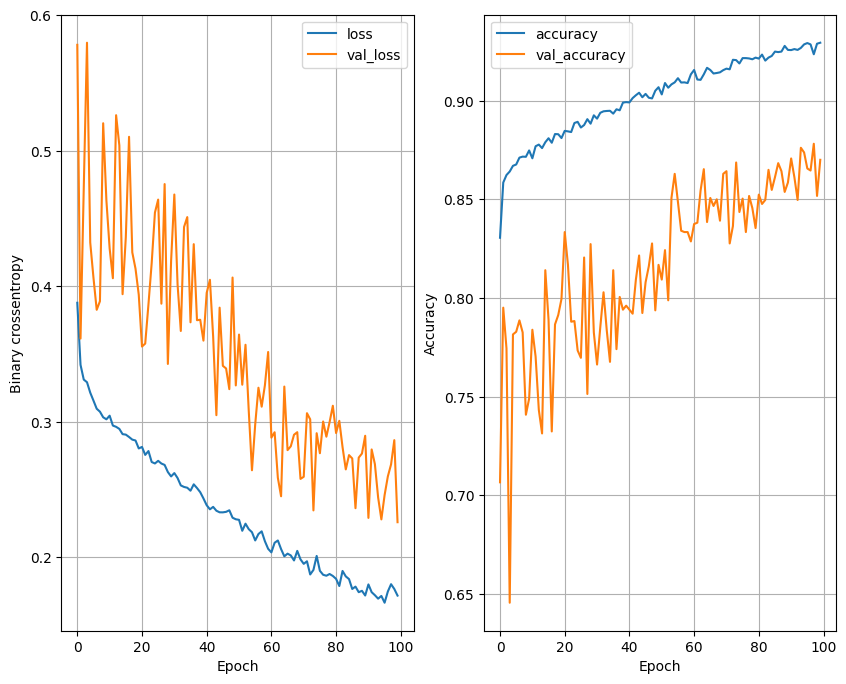

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.5563
num_nodes = 64 , droupout_prob = 0 , lr = 0.01 , batch_size = 128   


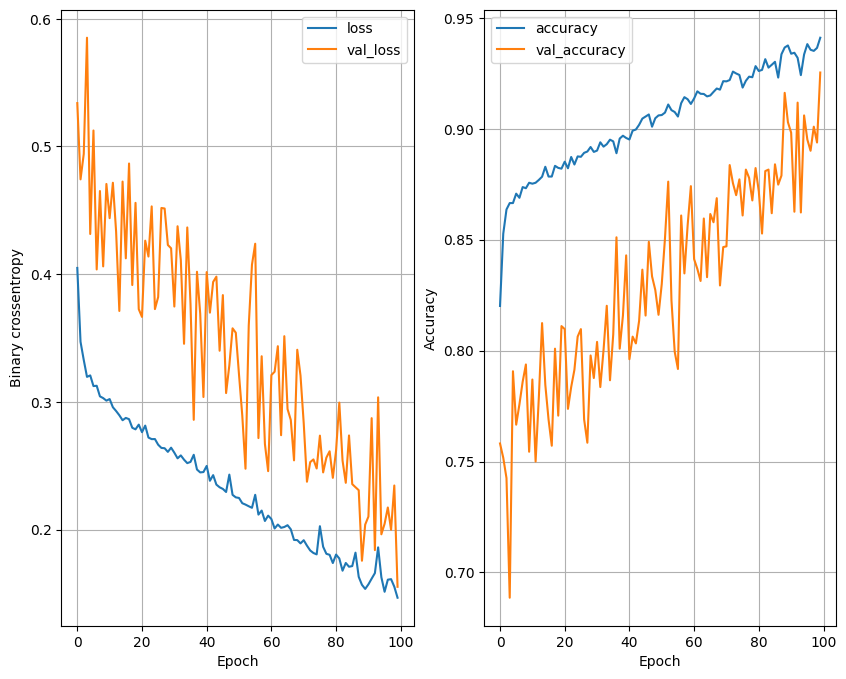

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.5674
num_nodes = 64 , droupout_prob = 0 , lr = 0.005 , batch_size = 32   


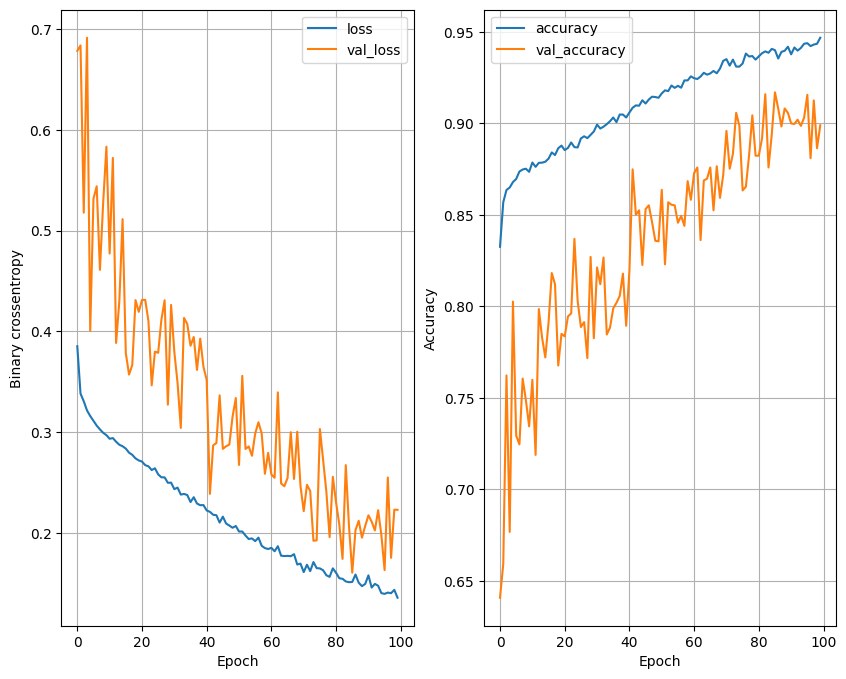

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.6745
num_nodes = 64 , droupout_prob = 0 , lr = 0.005 , batch_size = 64   


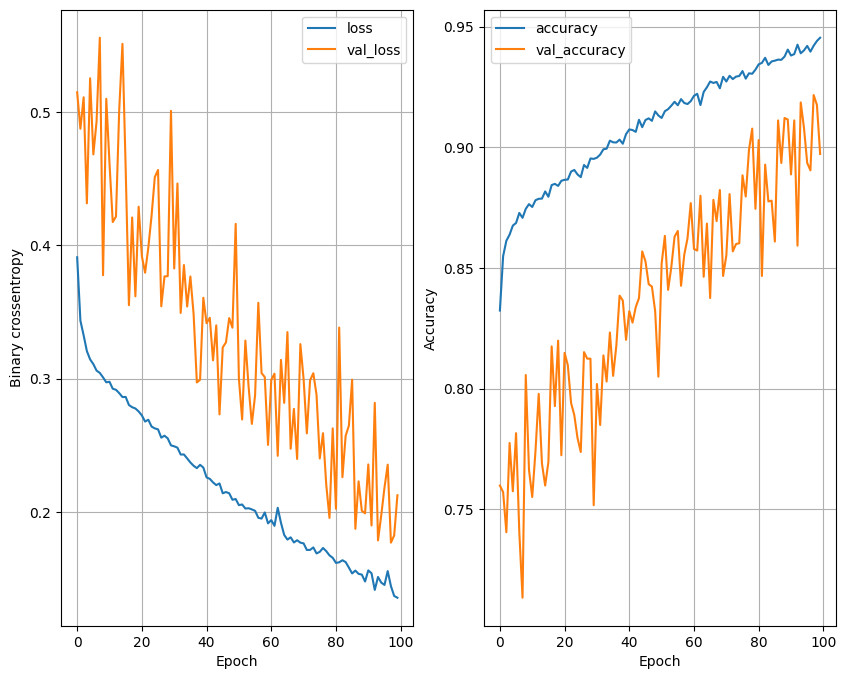

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.6004
num_nodes = 64 , droupout_prob = 0 , lr = 0.005 , batch_size = 128   


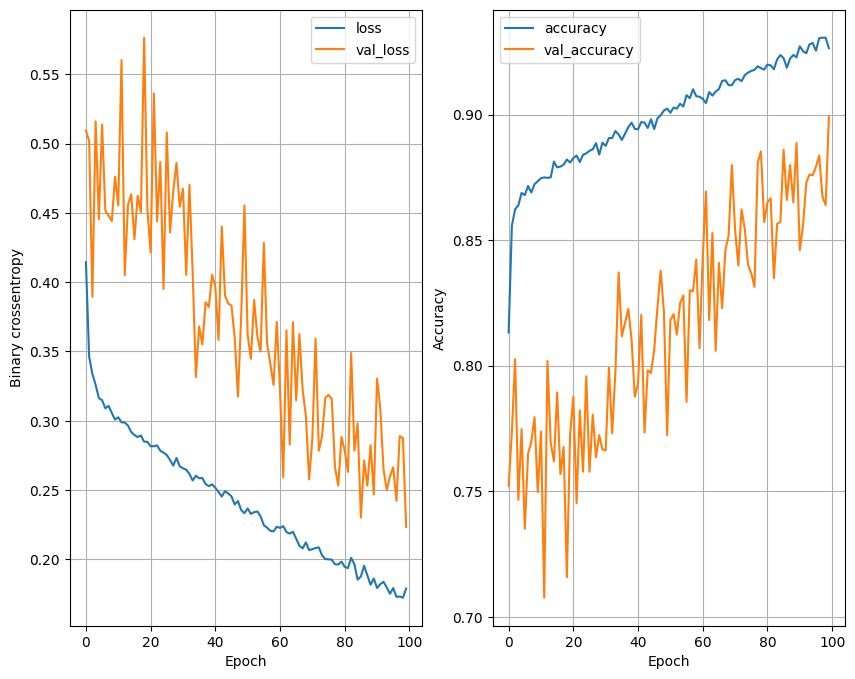

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.4737
num_nodes = 64 , droupout_prob = 0 , lr = 0.001 , batch_size = 32   


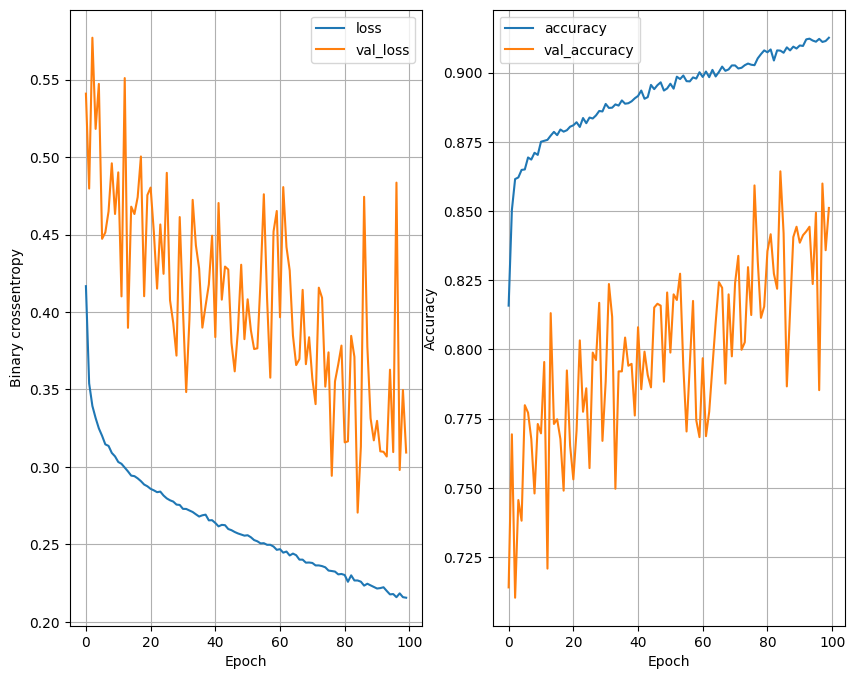

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3770
num_nodes = 64 , droupout_prob = 0 , lr = 0.001 , batch_size = 64   


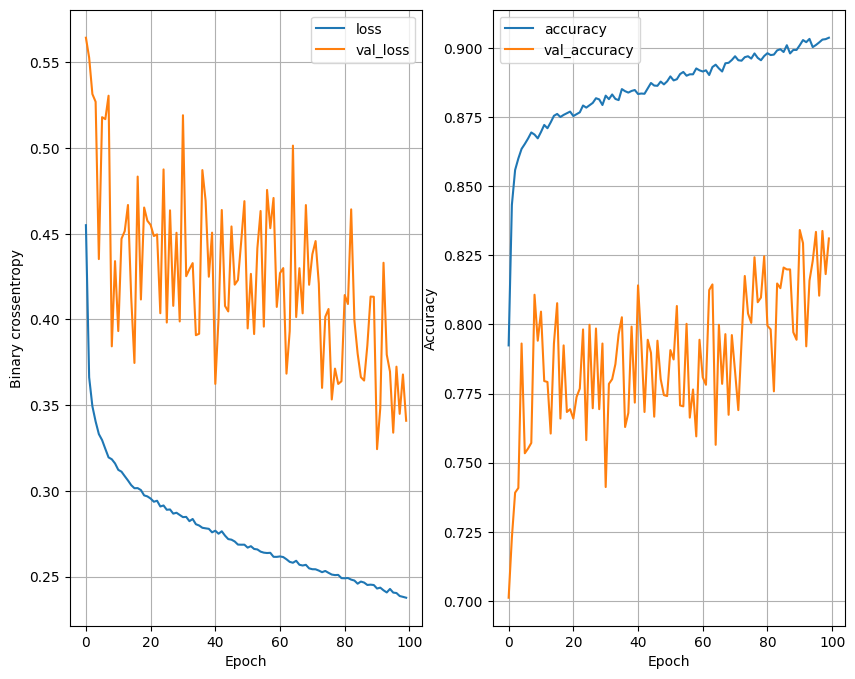

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.3501
num_nodes = 64 , droupout_prob = 0 , lr = 0.001 , batch_size = 128   


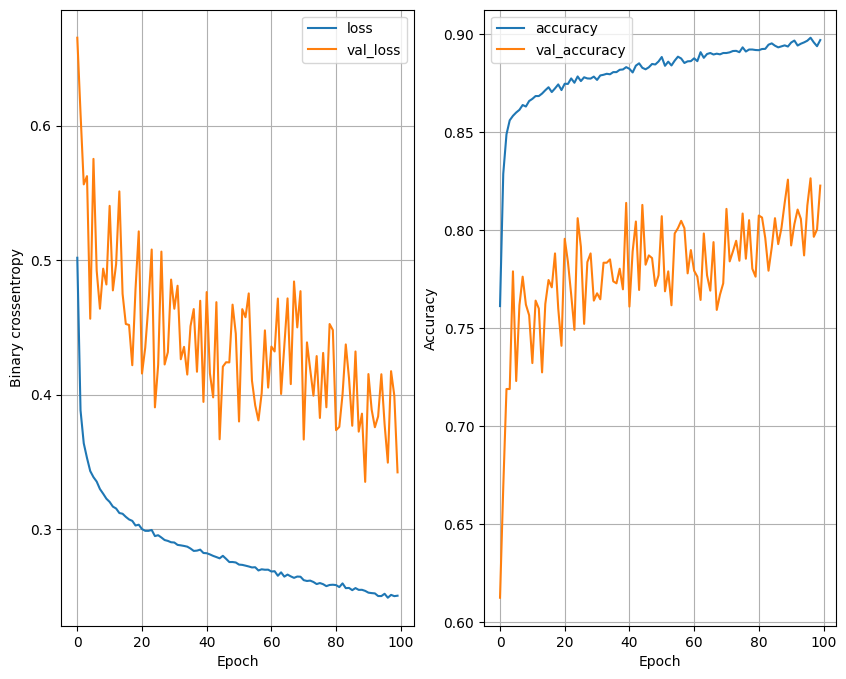

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3480
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 32   


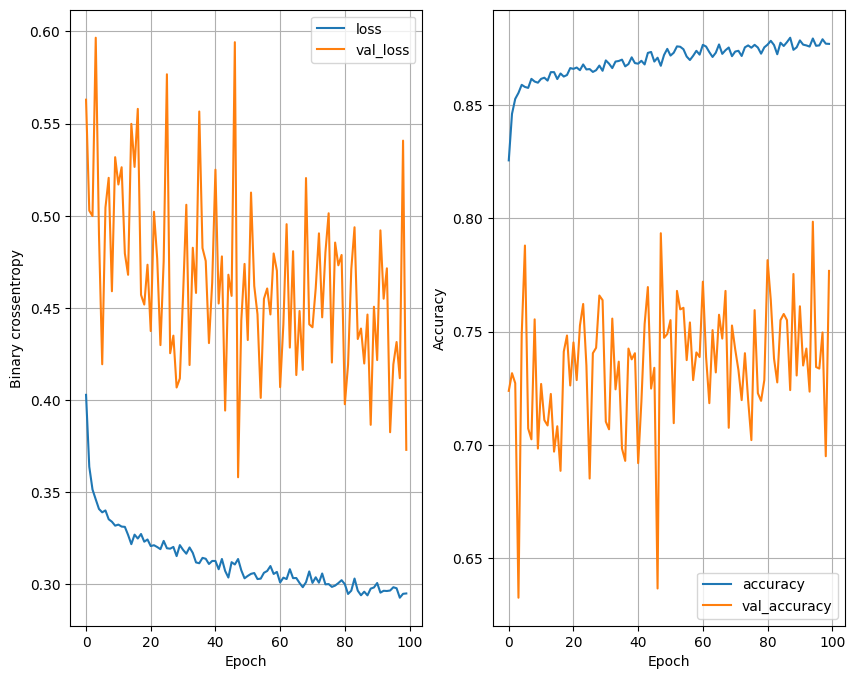

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8481 - loss: 0.3349
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 64   


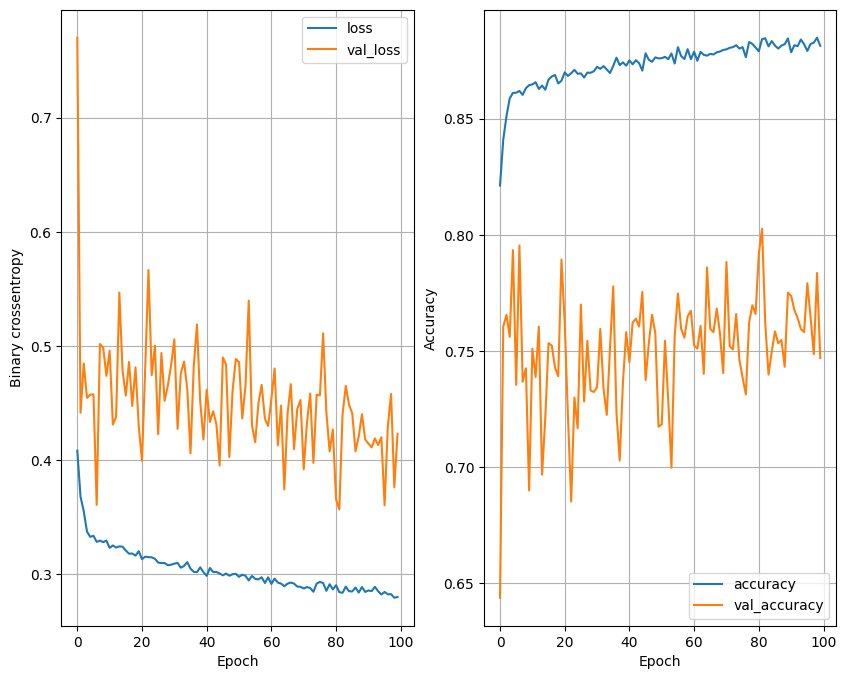

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8411 - loss: 0.3498
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.01 , batch_size = 128   


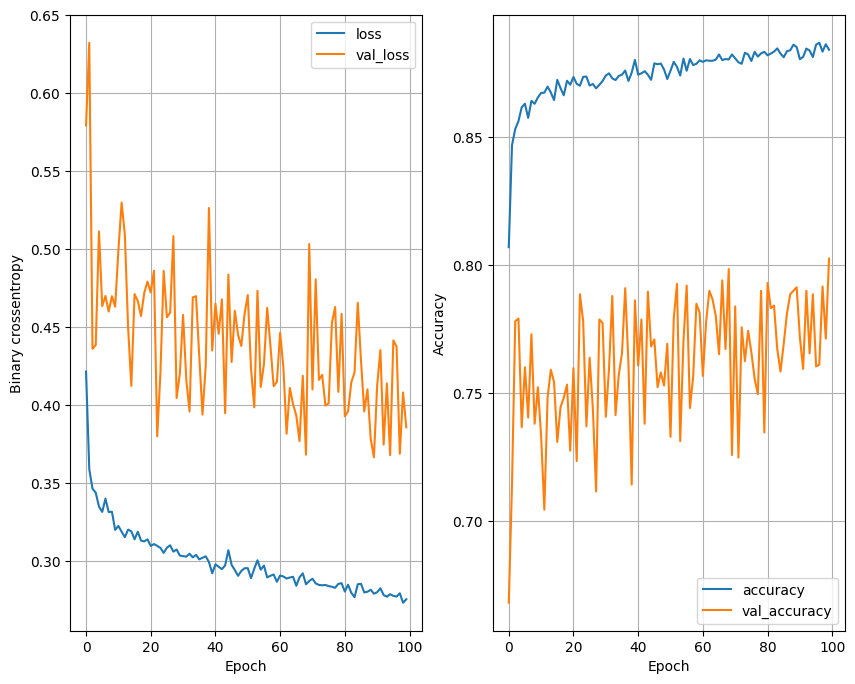

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.3427
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 32   


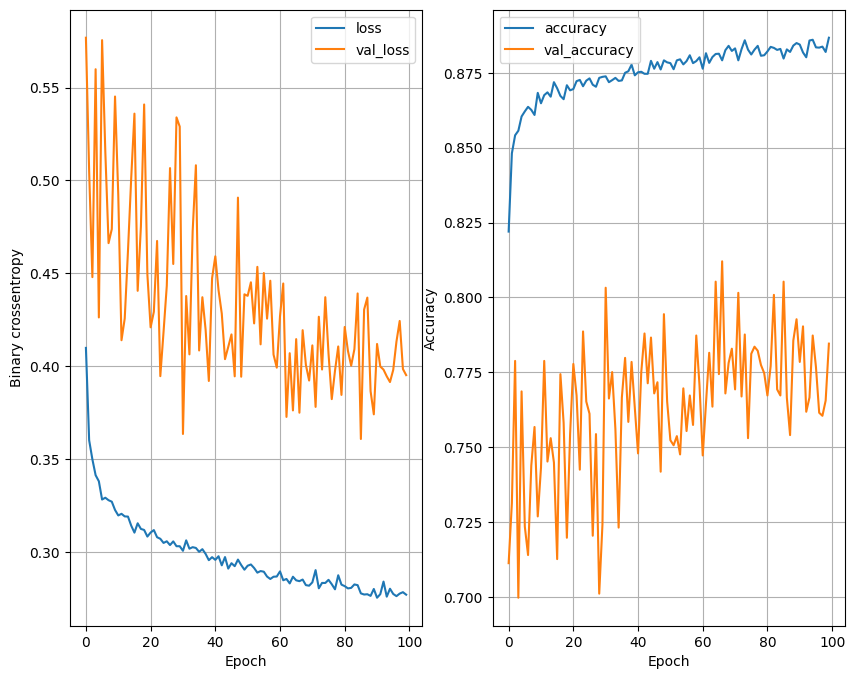

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8488 - loss: 0.3547
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 64   


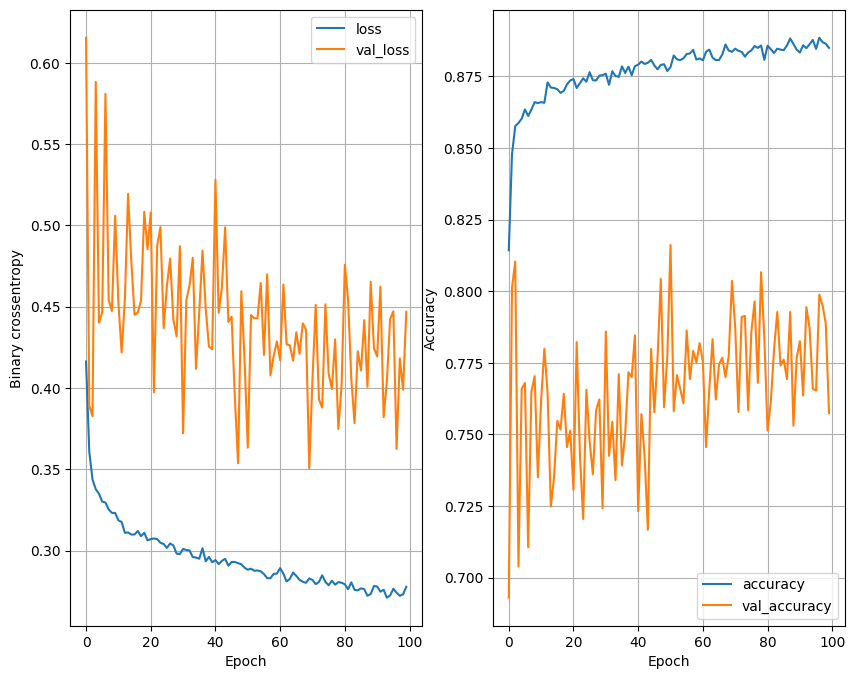

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.3474
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.005 , batch_size = 128   


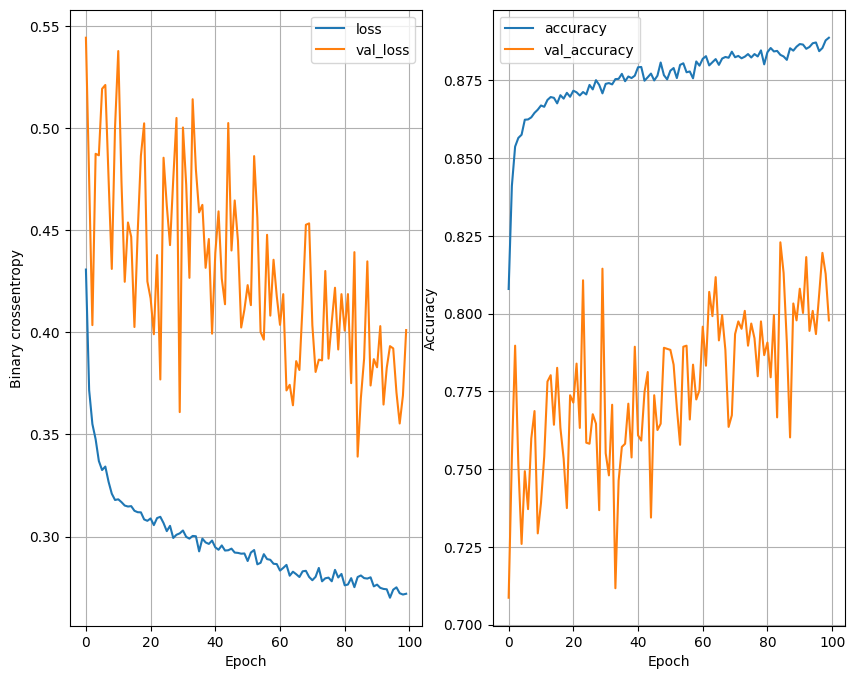

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.3346
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 32   


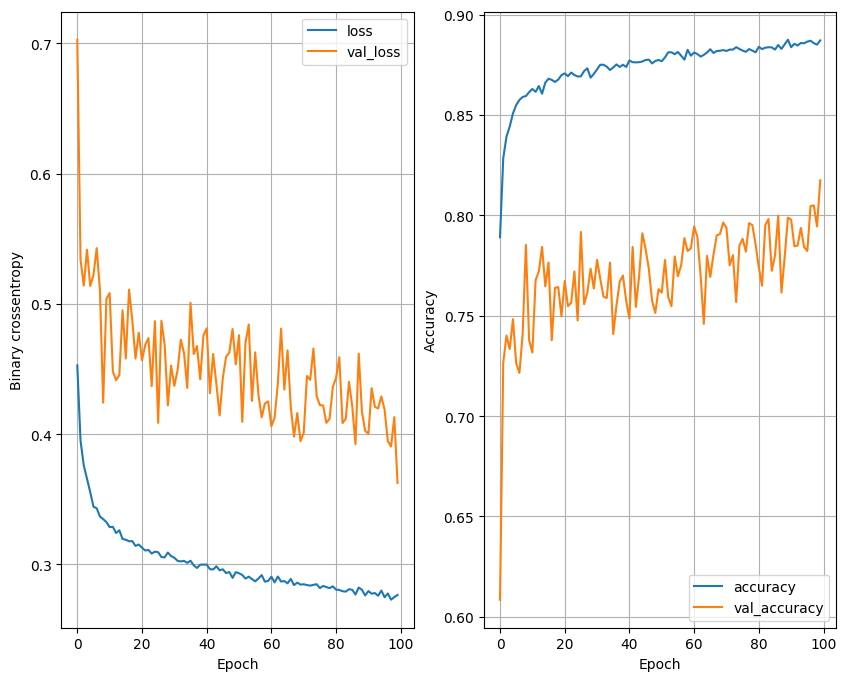

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8556 - loss: 0.3243
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 64   


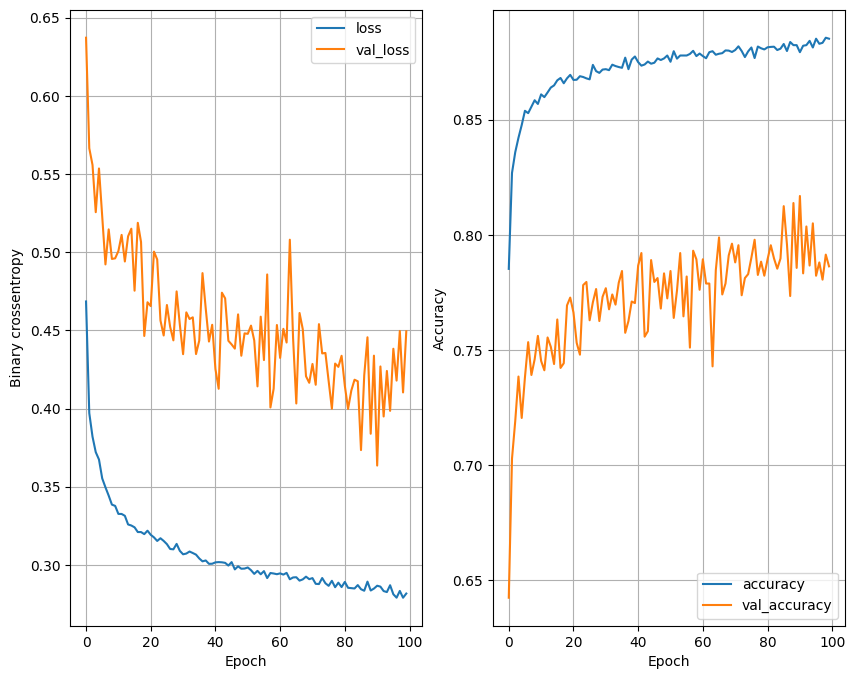

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8526 - loss: 0.3377
num_nodes = 64 , droupout_prob = 0.2 , lr = 0.001 , batch_size = 128   


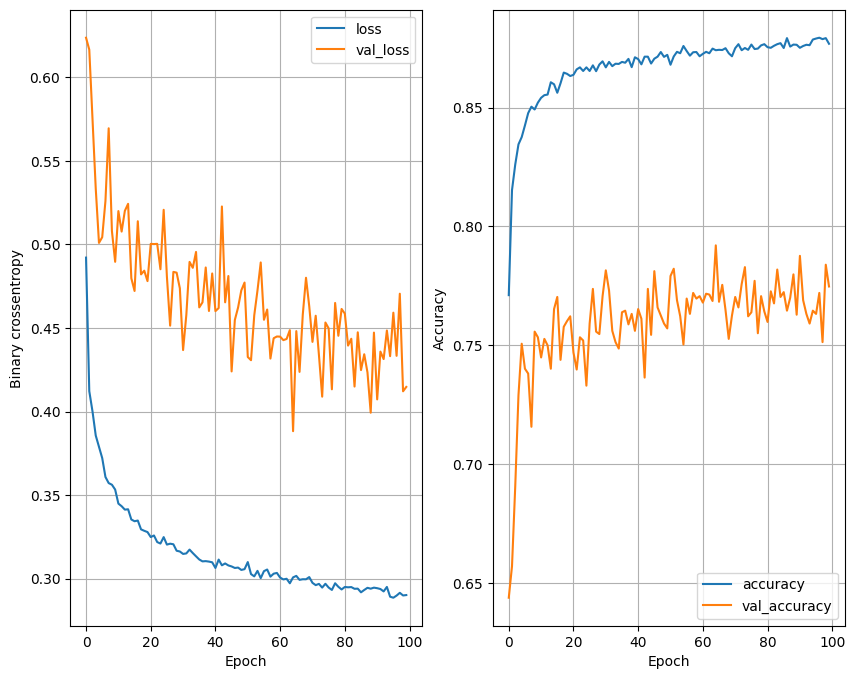

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3279


In [68]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16,32,64]:
  for droupout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"num_nodes = {num_nodes} , droupout_prob = {droupout_prob} , lr = {lr} , batch_size = {batch_size}   ")
        model , history = train_model(xtrain,ytrain,num_nodes,droupout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(xvalid, yvalid,)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [69]:
ypred= least_loss_model.predict(xtest)
ypred = (ypred > 0.5).astype(int).reshape(-1,)

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [70]:
ypred

array([1, 0, 1, ..., 0, 0, 1], shape=(4952,))

In [71]:
print(classification_report(ytest , ypred))


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2476
           1       0.78      0.94      0.85      2476

    accuracy                           0.84      4952
   macro avg       0.85      0.84      0.84      4952
weighted avg       0.85      0.84      0.84      4952

